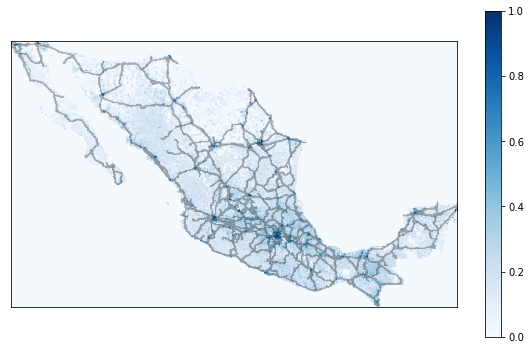

89383946.66263449
89600000.0


In [15]:
### Strategies for COVID-19 vaccination  under a shortage scenario: a geo-stochastic modelling approach.
### paper authors: N. L. Barreiro, C. I. Ventura, T. Govezensky, M. Núñez, P. G. Bolcatto, and R. A. Barrio
### code author: Dr. Nadia Barreiro

###### Importing libraries ####################

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
import scipy.io as sio
import time
from matplotlib import cm
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.lines as mlines
###### Tu use it in google drive jupyter notebook - The program will ask authorization in order to open files in drive ############################

#from google.colab import drive
#drive.mount('/content/drive',force_remount=True)
#!ls "/content/drive/My Drive/" -----------------> uncomment to dir in drive 

############################ Defining general variables ######################################################################

T=1000 #running time in days
prom=100 # averages

########## Defining maps to use #######################################
########## options: 'Argentina', 'Spain', 'Mexico' -Uncomment the one you want to use

#mapa='Argentina'
#mapa='Spain'
mapa='Mexico'

if mapa=='Argentina':
    map=0
##############################  ARGENTINA  MAP ######################################################################
################# PATHS #############################################
    #path1 = "/content/drive/My Drive/Colab Notebooks/Data/densidadK7.xlsx"
    #path2 = "/content/drive/My Drive/Colab Notebooks/Data/movilidad275-523.csv"
    path1="densK7_Arg.csv"
    path2="mob275-523_Arg.csv"
    eta=float(0.00001)
    Z=0.9973 # survival parameter  
    mu=1/77/365# Inverse of life expectancy in days
    umbral1= 0.10 # density threshold for cities connected by routes.
    
    #Vaccination stages
    tvac1=330
    tvac2=tvac1+30  
    tvac3=tvac2+30 
    tvac4=tvac3+60 
    tvac5=tvac4+60 
    tvac6=tvac1+365 # stages one year later 
    tvac7=tvac6+30  
    tvac8=tvac7+30 
    tvac9=tvac8+60
    tvac10=tvac9+60 

    #Vaccination rate for each stage
    rat1=0.003 
    rat2=0.02 
    rat3=0.02 
    rat4=0.02 
    rat5=0.02 
    rat6=0.003 
    rat7=0.02 
    rat8=0.02 
    rat9=0.02 
    rat10=0.02 


    #Amount of vaccines on each stage
    Ndosis1=300000  
    Ndosis2=5000000  
    Ndosis3=5000000  
    Ndosis4=9000000 
    Ndosis5=8700000     
    Ndosis6=300000  
    Ndosis7=5000000  
    Ndosis8=5000000  
    Ndosis9=9000000 
    Ndosis10=8700000 
    
    
elif mapa=='Spain':
    map=1
############################## Spain map ######################################################################
################# PATHS #############################################
    #path1 = "/content/drive/My Drive/Colab Notebooks/Data/densidadK7.xlsx"
    #path2 = "/content/drive/My Drive/Colab Notebooks/Data/movilidad275-523.csv"
    path1="densK5_Esp.csv"
    path2="mob170-237_Esp.csv"
    eta=float(0.0001)
    Z=0.9973 # survival parameter 
    mu=1/82/365 # Inverse of life expectancy in days
    umbral1= 0.10 # density threshold for cities connected by routes.
   
    # number of stages could be reduced using tvac#=T (the stage starts after the simulation ends)

    #Vaccination stages
    tvac1=330 
    tvac2=tvac1+30  
    tvac3=tvac2+30 
    tvac4=tvac3+30 
    tvac5=tvac4+30 
    tvac6=tvac1+365 # stages one year later 
    tvac7=tvac6+30  
    tvac8=tvac7+30 
    tvac9=tvac8+30 
    tvac10=tvac9+30 

    #Vaccination rate for each stage
    rat1=0.003 
    rat2=0.02 
    rat3=0.02 
    rat4=0.02 
    rat5=0.02 
    rat6=0.003 
    rat7=0.02 
    rat8=0.02 
    rat9=0.02 
    rat10=0.02 


    #Amount of vaccines on each stage
    Ndosis1=310000  
    Ndosis2=5200000  
    Ndosis3=5200000  
    Ndosis4=9370000 
    Ndosis5=9060000     
    Ndosis6=310000  
    Ndosis7=5200000  
    Ndosis8=5200000  
    Ndosis9=9370000 
    Ndosis10=9060000 
    
    
elif mapa=='Mexico':
    map=2
############################## Mexico map ######################################################################
################# PATHS #############################################
    #path1 = "/content/drive/My Drive/Colab Notebooks/Data/densidadk7_Mex.csv"
    #path2 = "/content/drive/My Drive/Colab Notebooks/Data/movilidad524x312_Mex.csv"
    path1 = 'densk7_Mex.csv'
    path2 = 'mob524-312_Mex.csv'
    eta=float(0.000005)
    Z=0.9919 # survival parameter 
    mu=1/75/365# Inverse of life expectancy in days
    umbral1= 0.2 # density threshold for cities connected by routes.
    
    # number of stages could be reduced using tvac#=T (the stage starts after the simulation ends)

    #Vaccination stages
    tvac1=330 
    tvac2=tvac1+30  
    tvac3=tvac2+30 
    tvac4=tvac3+30 
    tvac5=tvac4+30 
    tvac6=tvac1+365 # stages one year later 
    tvac7=tvac6+30  
    tvac8=tvac7+30 
    tvac9=tvac8+30 
    tvac10=tvac9+30 

    #Vaccination rate for each stage
    rat1=0.003 
    rat2=0.02 
    rat3=0.02 
    rat4=0.02 
    rat5=0.02 
    rat6=0.003 
    rat7=0.02 
    rat8=0.02 
    rat9=0.02 
    rat10=0.02 


    #Amount of vaccines on each stage
    Ndosis1=125000  
    Ndosis2=17100000  
    Ndosis3=13700000  
    Ndosis4=16500000 
    Ndosis5=79700000     
    Ndosis6=125000  
    Ndosis7=17100000  
    Ndosis8=13700000  
    Ndosis9=16500000 
    Ndosis10=79700000 

### density filter is added type if densfilt=1

densfilt=0

delta=180
    
ro1=np.loadtxt(path1, delimiter=',') 
nut2=np.loadtxt(path2,delimiter=',')

rcm = cm.get_cmap('Blues')
fig = plt.figure(figsize=(10,6))
sub1 = plt.subplot(1, 1, 1)
alphas =nut2*0.3
psm = sub1.imshow(np.sqrt(np.sqrt(np.sqrt(ro1/np.max(ro1)))), cmap=rcm, vmin=0, vmax=1, interpolation='nearest')
sub1.imshow(nut2,cmap="Greys",alpha=alphas)
sub1.set_xticks([])
sub1.set_yticks([])
fig.colorbar(psm, ax=sub1)
plt.show()





In [2]:
###################################################### Epidemiological Parameters ##################################################
beta=0.91 # Transmission paramter
sigma=14 # infectious period 
epsilon=1 # latency period
omega=140 # natural inmmunity period 


############################################################## auxiliary variables ############################################################
maxro=np.max(ro1)  
f,g=np.where(ro1==maxro) # maximum density coordinates
ro=ro1/maxro # Normalized density
Q,P=ro.shape
nut1=nut2

if map==0:
    p=0.1
    
elif map==1:
    p=0.2
    
elif map==2:
    p=0.1
    
###################################################### Density filter ##############################################################

if densfilt==0:
   u11=0 
elif densfilt==1:
   if map==0:
     u11=0.1
   elif map==1:
     u11=0.03
   elif map==2:
     u11=0.023
O=np.copy(ro)
O[O<u11]=0 
O[O>=u11]=1

#################################################### Mobility vectors ######################################################################

if map==0:
   tint=np.array([  23,    79,    102,   136,   235,   285,315,343,  T]) #####-------->>Intervention times
   a=np.array([0.60,  0.175, 0.195,  0.31  ,0.61, 0.99, 0.99 ,  0.7,  0.4]) #####-------->> Mobility 
   rui=np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.5,0.1,0.1]) # noise
   nutm1=np.array([a[0] for x in range(tint[0])]+[a[1] for x in range(tint[0],tint[1])]+[a[2] for x in range(tint[1],tint[2])]
   +[a[3] for x in range(tint[2],tint[3])]+[a[4] for x in range(tint[3],tint[4])]+[a[5] for x in range(tint[4],tint[5])]
   +[a[6] for x in range(tint[5],tint[6])]+[a[7] for x in range(tint[6],tint[7])]+[a[8] for x in range(tint[7],tint[8])]
   ,dtype='float64' ) # Mobility vector
   KT=np.array([rui[0] for x in range(tint[0])]+[rui[1] for x in range(tint[0],tint[1])]+[rui[2] for x in range(tint[1],tint[2])]
   +[rui[3] for x in range(tint[2],tint[3])]+[rui[4] for x in range(tint[3],tint[4])]+[rui[5] for x in range(tint[4],tint[5])]
   +[rui[6] for x in range(tint[5],tint[6])]+[rui[7] for x in range(tint[6],tint[7])]+[rui[8] for x in range(tint[7],tint[8])]
   ,dtype='float64') #noise

elif map==1:
   tint=[ 32,   59,    101,   130,   143,   152,   169,   180,   209,   234,    258,    273,   313,  343, T] #####-------->>Intervention times
   a=[0.6, 0.19, 0.11,  0.11,  0.11,  0.15,  0.30,  0.30,  0.295,  0.270,  0.275 ,  0.465,  0.31, 0.57,  1, 1]
   rui=np.array([0.10,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.8,1.1,2.3,2.3]) # noise parameter
   nutm1=np.array([a[0] for x in range(tint[0])]+[a[1] for x in range(tint[0],tint[1])]+[a[2] for x in range(tint[1],tint[2])]
   +[a[3] for x in range(tint[2],tint[3])]+[a[4] for x in range(tint[3],tint[4])]+[a[5] for x in range(tint[4],tint[5])]
   +[a[6] for x in range(tint[5],tint[6])]+[a[7] for x in range(tint[6],tint[7])]+[a[8] for x in range(tint[7],tint[8])]
   +[a[9] for x in range(tint[8],tint[9])]+[a[10] for x in range(tint[9],tint[10])]+[a[11] for x in range(tint[10],tint[11])]
   +[a[12] for x in range(tint[11],tint[12])]+[a[13] for x in range(tint[12],tint[13])]+[a[14] for x in range(tint[13],tint[14])]
   ,dtype='float64' )  ## Mobility vector          
   KT=np.array([rui[0] for x in range(tint[0])]+[rui[1] for x in range(tint[0],tint[1])]+[rui[2] for x in range(tint[1],tint[2])]
   +[rui[3] for x in range(tint[2],tint[3])]+[rui[4] for x in range(tint[3],tint[4])]+[rui[5] for x in range(tint[4],tint[5])]
   +[rui[6] for x in range(tint[5],tint[6])]+[rui[7] for x in range(tint[6],tint[7])]+[rui[8] for x in range(tint[7],tint[8])]
   +[rui[9] for x in range(tint[8],tint[9])]+[rui[10] for x in range(tint[9],tint[10])]+[rui[11] for x in range(tint[10],tint[11])]
   +[rui[12] for x in range(tint[11],tint[12])]+[rui[13] for x in range(tint[12],tint[13])]+[rui[14] for x in range(tint[13],tint[14])],dtype='float64') #ruido

elif map==2:
   tint=np.array( [ 16,   60,   92,   124,   174,   225,   255,  305, 325,  T])  #####-------->>Intervention times
   a=np.array([1,    0.17, 0.170, 0.287, 0.305,  0.336,  1,  0.56,  0.85,  0.53]) ## Mobility
   rui=np.array([0.1,0.1,0.3,0.3,0.3,0.5,0.9,0.9,0.3,0.3]) # noise parameter
   nutm1=np.array([a[0] for x in range(tint[0])]+[a[1] for x in range(tint[0],tint[1])]+[a[2] for x in range(tint[1],tint[2])]
   +[a[3] for x in range(tint[2],tint[3])]+[a[4] for x in range(tint[3],tint[4])]+[a[5] for x in range(tint[4],tint[5])]
   +[a[6] for x in range(tint[5],tint[6])]+[a[7] for x in range(tint[6],tint[7])]+[a[8] for x in range(tint[7],tint[8])]
   +[a[9] for x in range(tint[8],tint[9])],dtype='float64' ) #defino una movilidad en rutas               
   KT=np.array([rui[0] for x in range(tint[0])]+[rui[1] for x in range(tint[0],tint[1])]+[rui[2] for x in range(tint[1],tint[2])]
   +[rui[3] for x in range(tint[2],tint[3])]+[rui[4] for x in range(tint[3],tint[4])]+[rui[5] for x in range(tint[4],tint[5])]
   +[rui[6] for x in range(tint[5],tint[6])]+[rui[7] for x in range(tint[6],tint[7])]+[rui[8] for x in range(tint[7],tint[8])]
   +[rui[9] for x in range(tint[8],tint[9])],dtype='float64') #ruido

nutm=nutm1
nutl=nutm1


############################################################## routes matrix ############################################################


rut=np.array(0)
WW3=np.array(np.where(ro>=umbral1)) # only connecting big cities (above threshold)

for i,j in np.nditer(WW3, flags=['external_loop'], order='F'):
   if nut1[i,j]==1:
      rut=np.append(rut,[i,j])
rut=rut[1:]
rut1 = np.arange(len(rut)).reshape(2,int(len(rut)/2))
for i in range(int(len(rut)/2)):
  rut1[0,i]=rut[2*i]
  rut1[1,i]=rut[2*i+1]

  
rut2= (ro>=umbral1) & (nut1==1)



############################################################## Noise matrix ############################################################

filt1=(ro>0) & (ro<=1) # cells where noise can create new virus foci

################################################# Memory allocation for arrays ############################################################
V2=np.zeros((T,prom),dtype='float')
#VV2=np.zeros((Q,P,T),dtype='float')
#Y2=np.zeros((T,prom),dtype='float')
#AC=np.zeros((T,prom),dtype='float')
yym=np.zeros((T,prom),dtype='float')
vvvv=np.zeros((T),dtype='float')
#CC2=np.zeros((Q,P,T))
#CC1=np.zeros((Q,P,T))
#################################################################### Intial conditions ######################################

def cond():
  II=np.zeros((Q,P,T),dtype='float')
 # C=np.zeros((Q,P,T),dtype='float')
  V=np.zeros((Q,P,T),dtype='float')
  S=np.ones((Q,P,T),dtype='float')
 # Z=np.zeros((Q,P,T),dtype='float')
 # E=np.zeros((Q,P,T),dtype='float')
  M=np.zeros((Q,P,T),dtype='float')
  if map==0:
      II[f-4,g-4,0]= eta 
      S[f-4,g-4,0]=1-eta 
  elif map==1:
      II[f-4,g-5,0]= eta 
      S[f-4,g-5,0]=1-eta 
  elif map==2:
      II[f-2,g-1,0]= eta 
      S[f-2,g-1,0]=1-eta 
  return S,II,V,M

############################################################# vaccination function ##########################################################
NNN=[Ndosis1,Ndosis2,Ndosis3,Ndosis4,Ndosis5,Ndosis6,Ndosis7,Ndosis8,Ndosis9,Ndosis10]
NNNN=np.cumsum(NNN)
ttt=[tvac1,tvac2,tvac3,tvac4,tvac5,tvac6,tvac7,tvac8,tvac9,tvac10,T]
rat=[rat1,rat2,rat3,rat4,rat5,rat6,rat7,rat8,rat9,rat10]
ratt=np.array(rat)*0.1

def vac(t,vacus): 
    v=0
    for i in range(len(NNN)):
        if (t>=ttt[i]) & (t<ttt[i+1]):
          aux=vacus[t]
          aux2=vacus[ttt[0]-1]
          if aux-aux2<=(NNNN[i]-NNN[i]/100):
              v=rat[i]
          elif ((NNNN[i]-NNN[i]/100)<(aux-aux2)) and ((aux-aux2)<NNNN[i]):
              v=ratt[i]
          else:
              v=0   
    return v    

vv=0

############################################################# Incidence function ##########################################################


def G(t,II,S,beta,filt3,ro,U): #Función de incidencia
    if t>=0:

       gg=U[filt3,t]*ro[filt3]*(1-np.exp(-beta*(II[filt3,t])))*S[filt3,t]
    elif t<0:
       g1=np.zeros((Q,P))  
       gg=g1[filt3] 
    return gg 


################################################ Simulation ##################################################
start_time = time.time()
for pp in range(prom): ##### LOOP DE PROMEDIACION
        print('average ' + str(pp+1)+' of ' + str(prom))
        S,II,V,M=cond()  
        rando= np.random.random(size=(Q,P,T))
        vv=np.zeros((T))
        vacus=np.zeros(T)
        for t in range (T-1):
            M[:,:,t]= (rando[:,:,t]<nutl[t]) 
        U=M.astype(float) ##### MATRIZ DE ESTOCASTICA LOCAL
        for t in range(T-1):  ###### Loop temporal
          #print(t)      
          filt3= (S[:,:,t+1]==1) & (S[:,:,t]<1) & (ro>0) # FILTRO SOBRE QUE CELDAS EVOLUCIONA      

          if t<(tvac1-1):
              S[filt3,t+1]=mu +(1-mu)*(S[filt3,t]-G(t,II,S,beta,filt3,ro,U)
              +G(t-1-epsilon-sigma-omega,II,S,beta,filt3,ro,U)*Z*((1-mu)**(epsilon+sigma+omega)))
              II[filt3,t+1]=(1-mu)*(II[filt3,t]+((1-mu)**(epsilon))*G(t-1-epsilon,II,S,beta,filt3,ro,U)
              -((1-mu)**(epsilon+sigma))*G(t-1-epsilon-sigma,II,S,beta,filt3,ro,U))
             # -U[filt3,t-1-epsilon-sigma]*(1-p)*((1-mu)**(epsilon+sigma))*G1(t-1-epsilon-sigma,X,Y,filt3,beta,ro)-p*((1-mu)**(epsilon +al))*U[filt3,t-1-epsilon-al]*G1(t-1-epsilon-al,X,Y,filt3,beta,ro))
             # Z[filt3,t+1]=(1-mu)*(Z[filt3,t]+U[filt3,t-1-epsilon-sigma]*((1-p)*(1-mu)**(epsilon+sigma))*G1(t-1-epsilon-sigma,X,Y,filt3,beta,ro)-U[filt3,t-1-epsilon-sigma-omega]*(1-p)*((1-mu)**(epsilon+sigma+omega))*G1(t-1-epsilon-sigma-omega,X,Y,filt3,beta,ro))
             # C[filt3,t+1]=(1-mu)*(C[filt3,t]+U[filt3,t-1-epsilon-al]*p*((1-mu)**(epsilon +al))*G1(t-1-epsilon-al,X,Y,filt3,beta,ro)-U[filt3,t-1-epsilon-sigma-omega]*p*((1-mu)**(epsilon+sigma+omega))*G1(t-1-epsilon-sigma-omega,X,Y,filt3,beta,ro))
             # V[filt3,t+1]=(1-mu)*(V[filt3,t])
          elif t>=(tvac1-1): 
              S[filt3,t+1]=mu +(1-mu)*(S[filt3,t]-G(t,II,S,beta,filt3,ro,U)
              +G(t-1-epsilon-sigma-omega,II,S,beta,filt3,ro,U)*Z*((1-mu)**(epsilon+sigma+omega))
              -vv[t]*O[filt3]*S[filt3,t]
              +((1-mu)**(delta-1))*vv[t-delta]*O[filt3]*S[filt3,t-delta])
              II[filt3,t+1]=(1-mu)*(II[filt3,t]+((1-mu)**(epsilon))*G(t-1-epsilon,II,S,beta,filt3,ro,U)
              -((1-mu)**(epsilon+sigma))*G(t-1-epsilon-sigma,II,S,beta,filt3,ro,U))
            # -U[filt3,t-1-epsilon-sigma]*(1-p)*((1-mu)**(epsilon+sigma))*G1(t-1-epsilon-sigma,X,Y,filt3,beta,ro)-p*((1-mu)**(epsilon +al))*U[filt3,t-1-epsilon-al]*G1(t-1-epsilon-al,X,Y,filt3,beta,ro))
            #  Z[filt3,t+1]=(1-mu)*(Z[filt3,t]+U[filt3,t-1-epsilon-sigma]*((1-p)*(1-mu)**(epsilon+sigma))*G1(t-1-epsilon-sigma,X,Y,filt3,beta,ro)-U[filt3,t-1-epsilon-sigma-omega]*(1-p)*((1-mu)**(epsilon+sigma+omega))*G1(t-1-epsilon-sigma-omega,X,Y,filt3,beta,ro))
            #  C[filt3,t+1]=(1-mu)*(C[filt3,t]+U[filt3,t-1-epsilon-al]*p*((1-mu)**(epsilon +al))*G1(t-1-epsilon-al,X,Y,filt3,beta,ro)-U[filt3,t-1-epsilon-sigma-omega]*p*((1-mu)**(epsilon+sigma+omega))*G1(t-1-epsilon-sigma-omega,X,Y,filt3,beta,ro))
              V[filt3,t+1]=(1-mu)*(V[filt3,t]+ vv[t]*O[filt3]*S[filt3,t]-((1-mu)**(delta-1))*vv[t-delta]*S[filt3,t-delta]*O[filt3])


          if t>=tvac1:
             vv1=np.sum(vv[t]*(1-mu)*S[filt3,t]*ro1[filt3]*O[filt3])
             vacus[t+1]=vacus[t]+vv1
          vv[t+1]=vac(t+1,vacus)  
 
        ###################  Moving to neighbor cells ############################
          filt5=(ro>0) & (II[:,:,t]>=eta) & (S[:,:,t]<=1-eta)
          filt6= filt5.astype(float)
          auxil=np.zeros((Q,P))
          auxil2=np.random.random((Q,P))<nutm[t]
          auxil2=auxil2.astype(float)
          auxil[0:Q-1,:]=filt6[1:Q,:]
          auxil[1:Q,:]=auxil[1:Q,:]+filt6[0:Q-1,:]
          auxil[:,0:P-1]=auxil[:,0:P-1]+filt6[:,1:P]
          auxil[:,1:P]=auxil[:,1:P]+filt6[:,0:P-1]
          auxil[auxil>1]=1
          auxil3=auxil2*auxil
          auxil3=auxil3.astype(bool)
          filt7=(II[:,:,t]<=0) & (S[:,:,t+1]==1) & (II[:,:,t+1]==0) & (auxil3) & (ro>0)
          II[filt7,t+1]=eta
          S[filt7,t+1]=1-eta              
                      
        
 ###################  Moving to distant cells ############################
          for m,n in np.nditer(rut1, flags=['external_loop'], order='F'):  
           if II[m,n,t]>=eta:       
             for v,b in np.nditer(rut1, flags=['external_loop'], order='F'):
                             d1=np.sqrt((m-v)**2 + (n-b)**2) +.000000000001              
                             nu=nutm1[t]*ro[m,n]*ro[v,b]
                             if (II[v,b,t]<=0) & (S[v,b,t+1]==0) & (S[v,b,t+1]==1) & (d1>7) and (random.random()<nu):        
                                        II[v,b,t+1]=eta1 
                                        S[v,b,t+1]=1-eta1               
                                               

 ###################  Starting new foci using noise #############################
          rando2=np.random.random(size=(Q,P)) 
          U2=rando2< float(math.exp(-1/(KT[t])))
          U2=U2.astype(float)
          U2=U2*eta
          filt2= (II[:,:,t]<eta) & (II[:,:,t+1]<=0) & (S[:,:,t+1]>=eta) &(filt1)
          U3=U2[filt2]
          II[filt2,t+1]=U3
          S[filt2,t+1]=S[filt2,t+1]-U3   
                    
                            
########  Creating time vectors #####################################
          


          filtn=(II[:,:,t]>0) & (II[:,:,t+1]>0)  
          if (t>=epsilon):        
                A=p*((1-mu)**(epsilon+1))*G(t-epsilon-1,II,S,beta,filtn,ro,U)*ro1[filtn]
                JJ=np.sum(A[A>0])
                yym[t+1,pp]=JJ
                JJ3=np.sum(V[:,:,t+1]*ro1)
                V2[t+1,pp]=JJ3



        vvvv=vvvv+vacus           
        
vacus=vvvv/prom # Number of vaccines given
print("--- %s seconds ---" % (time.time() - start_time))
N=np.sum(NNN)
if map==0:
    #pathc="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_yym_ARG.mat"
    #pathd="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_V_ARG.mat"
    #pathe="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_vac_ARG.mat"
    pathc="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_yym_ARG.mat"
    pathd="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_V_ARG.mat"
    pathe="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_vac_ARG.mat"

elif map==1:
    #pathc="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_yym_SPA.mat"
    #pathd="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_V_SPA.mat"
    #pathe="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_vac_SPA.mat"
    pathc="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_yym_SPA.mat"
    pathd="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_V_SPA.mat"
    pathe="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_vac_SPA.mat"
                     
elif map==2:
 #   pathc="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_yym_Mex.mat"
 #   pathd="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_V_Mex.mat"
 #   pathe="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_vac_Mex.mat"
    pathc="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_yym_Mex.mat"
    pathd="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_V_Mex.mat"
    pathe="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_vac_Mex.mat"
    
    
sio.savemat(pathc,{"serie":yym})
np.savetxt(pathd, V2, delimiter=",")   
np.savetxt(pathe, vacus, delimiter=",")   
                    
print('end')


average 1 of 100
average 2 of 100
average 3 of 100
average 4 of 100
average 5 of 100
average 6 of 100
average 7 of 100
average 8 of 100
average 9 of 100
average 10 of 100
average 11 of 100
average 12 of 100
average 13 of 100
average 14 of 100
average 15 of 100
average 16 of 100
average 17 of 100
average 18 of 100
average 19 of 100
average 20 of 100
average 21 of 100
average 22 of 100
average 23 of 100
average 24 of 100
average 25 of 100
average 26 of 100
average 27 of 100
average 28 of 100
average 29 of 100
average 30 of 100
average 31 of 100
average 32 of 100
average 33 of 100
average 34 of 100
average 35 of 100
average 36 of 100
average 37 of 100
average 38 of 100
average 39 of 100
average 40 of 100
average 41 of 100
average 42 of 100
average 43 of 100
average 44 of 100
average 45 of 100
average 46 of 100
average 47 of 100
average 48 of 100
average 49 of 100
average 50 of 100
average 51 of 100
average 52 of 100
average 53 of 100
average 54 of 100
average 55 of 100
average 56 of 100
a

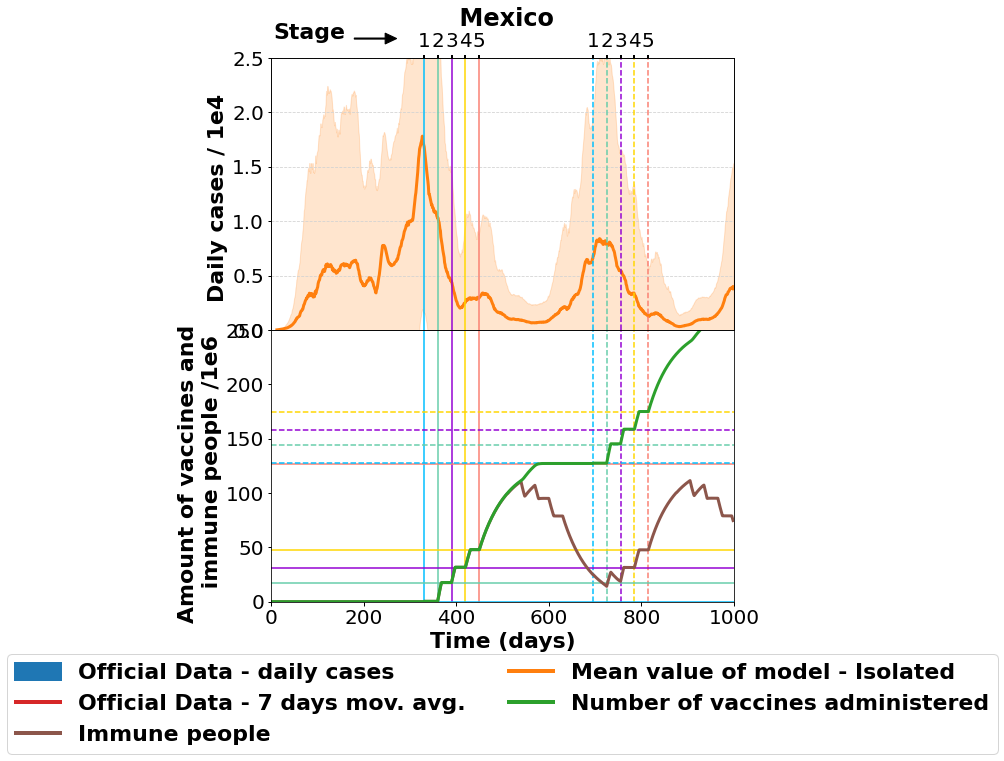

In [17]:
ventana1=7
NNN=[Ndosis1,Ndosis2,Ndosis3,Ndosis4,Ndosis5,Ndosis6,Ndosis7,Ndosis8,Ndosis9,Ndosis10]
N=np.sum(NNN)
if map==0:# ARGENTINA
    #pathc="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_yym_ARG.mat"
    #pathd="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_V_ARG.mat"
    #pathe="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_vac_ARG.mat"
    pathc="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_yym_ARG.mat"
    pathd="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_V_ARG.mat"
    pathe="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_vac_ARG.mat"

    urln1="https://covid.ourworldindata.org/data/owid-covid-data.csv"
    dat=pd.read_csv(urln1)
    dat=dat[dat["iso_code"]=="ARG"].reset_index(drop=True)
    Casos=dat["new_cases"]
    fullvaccs=np.array(dat["people_fully_vaccinated"])#.fillna(0))
    del(dat)
    CC=Casos.rolling(window=ventana1).mean()
    CC1=np.array(Casos)
    CC=np.array(CC)
    fullvaccs=fullvaccs[62:373] 
    CC=CC[62:373]
    Casos=Casos[62:373]
    CC1=CC1[62:373]
    x3=np.array(range(len(fullvaccs)))
elif map==1:# Spain
    #pathc="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_yym_SPA.mat"
    #pathd="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_V_SPA.mat"
    #pathe="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_vac_SPA.mat"
    pathc="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_yym_SPA.mat"
    pathd="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_V_SPA.mat"
    pathe="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_vac_SPA.mat"
    urln1="https://covid.ourworldindata.org/data/owid-covid-data.csv"
    dat=pd.read_csv(urln1)
    dat=dat[dat["iso_code"]=="ESP"].reset_index(drop=True)
    #print(dat)
    Casos=dat["new_cases"]#
    fullvaccs=np.array(dat["people_fully_vaccinated"])#.fillna(0))
    del(dat)
    CC=Casos.rolling(window=ventana1).mean()
    CC1=np.array(Casos)
    CC=np.array(CC)
    fullvaccs=fullvaccs[3:373] 
    CC=CC[3:373]
    Casos=Casos[3:373]
    CC1=CC1[3:373]
    x3=np.array(range(len(fullvaccs)))
elif map==2: # Mexico
 #   pathc="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_yym_Mex.mat"
 #   pathd="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_V_Mex.mat"
 #   pathe="/content/drive/My Drive/Colab Notebooks/Data/code_vac"+"_"+str(prom)+"T_"+str(T)+"_vac_Mex.mat"
    pathc="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_yym_Mex.mat"
    pathd="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_V_Mex.mat"
    pathe="code_vac"+"_"+str(prom)+"T_"+str(T)+"_"+str(N)+"_vac_Mex.mat"
    ventana1=7
    #urln1="https://covid.ourworldindata.org/data/owid-covid-data.csv"
    #dat=pd.read_csv(urln1)
    #dat=dat[dat["iso_code"]=="MEX"].reset_index(drop=True)
    #Casos=dat["new_cases"]
    #fullvaccs=np.array(dat["people_fully_vaccinated"].fillna(0))
    #del(dat)
    Casos=np.array([2,1,1,0,0,0,0,0,1,0,0,4,1,3,11,18,10,30,11,26,47,40,50,67,53,39,72,114,136,135,150,104,125,168,136,184,209,261,306,357,409,268,416,387,456,364,397,463,465,597,642,789,528,753,1077,1124,1279,1001,862,880,1263,1081,1471,1564,1393,1428,1480,1156,1661,2046,1968,2001,1613,1347,2062,1922,2487,2516,2180,2142,2492,2801,2321,3069,3056,3437,2854,2566,3567,3575,3487,3332,2979,3254,2861,4017,4039,4586,4487,3710,3597,3096,4335,5041,4945,5391,3607,4281,3538,4748,5090,5846,5193,4870,5516,4725,6492,5613,6302,5617,4553,4181,3928,5608,5865,6960,6959,7138,4835,5061,6461,7222,7516,7114,6292,4627,4837,7280,6348,6614,7492,7862,5483,5340,7081,6214,8712,7819,6970,5658,5134,7442,5939,7981,8732,9866,5010,4922,6347,6338,6804,6935,6706,4518,5738,6903,6048,7610,5800,6551,4592,3687,5685,5980,6995,6120,6692,4076,3656,5075,5438,6221,6013,6168,4263,3840,6686,5081,6130,6397,6524,4764,3599,5525,4798,5014,6127,5858,4551,3443,4926,4588,3285,4998,5335,3657,3012,4835,4941,5583,5576,5754,4012,3510,4590,5217,5264,4930,5021,3832,3417,4828,4580,5300,5263,4577,3175,3542,4295,4056,5514,6751,5447,4119,3699,5788,6845,6612,6604,6025,4360,4166,5942,5595,5948,6000,6151,4430,3763,5250,5225,5567,5931,6810,5887,4960,5746,7646,5658,5558,5860,3269,2874,1757,3918,4472,6426,6719,9187,7483,10794,10335,8107,12081,10008,6388,6472,8819,11251,11030,12127,11625,7455,6399,11006,11974,11897,12253,12057,8608,5930,11228,10297,11799,12248,12129,6870,5370,12511,11653,12485,9679,4974,6217,5996,12099,12406,12159,11091,6359,5211,6464,11271,13345,13734,14362,16105,10003,7594,14395,15873,16468,21366,20523,11170,8074,18894,20548,22339,21007,20057,10872,8521,17165,17944,18670,16374,15337,7030,5448,4384,12153,13575,13051,13209,6065,3868,10738,11138,10677,10388,9741,4099,3098,8683,8988,9099,7829,7785,3104,2252,8634,8642,8462,7512,7246,2810,2343,7913,7793,7521,6797,6561,2734,1877,7407,6674,6470,6743,6104,2415,1439,1278,6455,6726,5722,5729,2133,1388,5881,5714,5787,5303,4922,1783,1292,5068,5977,5381,3089,1838,1263,1247,4675,5499,5140,5045,6356,1793,1627,4293,5113,4189,4504,4157,1506,1308,4262,4639,3708,3911,3308,1653,1143,3592,3818,3990,3821,3025,1093,1027,3064,3021,2846,3043,2743,1175,704,1897,3090,3632,2880,2695,1233,822,2767,2000,2628,2604,2586,1274,703,2483,2932,3000,3056,2725,1307,932,6917,3269,2894,2809,2649,1401,881,3449,3855,3672,3282,3649,1707,1175,4250,3789,4253,4098,3964,1578,1268,4233,4963,5340,5270,5051,2384,1661,5711,6105,6081,5879,6228,2611,1805,7989,8507,9452,9319,9581,3779,3074,11137,12116,12821,12420,12631,4438,5307,13853,15198,16244,16421,15823,6535,5920,17408,19028,19223,19346,18809,6740,6506,18911,20685,21569,21563,20018,7573,6513,19555,22711,24975,22758,23642,9295,7172,14814,28953,23006,21897,20307,7658,6543,18262,21250,20633,19556,17546,6837,5564,11146,17337,18138,17409,15586,7504,5127,15784,15876,14828,14233,12511,5139,4161,12929,13217,7040,3754,11711,4983,3367,12521,11603,11808,10139,9697,3988,3007,9792,9796,8828,7388,7369,2980,2282,7682,7697,7613,7158,6153,2690,2007,7187,6320,5825,5286,5203,1993,1413,4220,5069,4798,4653,4452,1666,1121,4538,4797,4503,4001,3478,1446,994,3588,2660,3763,3614,3574,1382,810,3663,3556,3493,3353,3130,942,775,735,3836,3915,3837,3306,1225,916,3698,4287,4128,3445,2956,1050,724,3307,3345,3146,3088,2841,970,752,3304,3215,3180,2992,2655,855])
    Casos=pd.Series(Casos)
    CC=Casos.rolling(window=ventana1).mean()
    CC1=np.array(Casos.T)
    CC=np.array(CC.T)
    #fullvaccs=fullvaccs[57:373] 
    #CC=CC[57:373]
    CC=CC[0:373]
    #Casos=Casos[57:373]
    #CC1=CC1[57:373]
    CC1=CC1[0:373]
    #x3=np.array(range(len(fullvaccs)))
    #print(CC)
    #x3=np.array(range(len(fullvaccs)))

    
yym1=np.array(sio.loadmat(pathc)['serie'])
V2=np.loadtxt(pathd, delimiter=",")
vacus=np.loadtxt(pathe, delimiter=",")

al=0
yyy=np.zeros((T))

stdCD=np.zeros((T))
CDsup=np.zeros((T))
CDinf=np.zeros((T))

CM1=np.zeros((T))
CDsup1=np.zeros((T))
CDinf1=np.zeros((T))

VVV=np.zeros((T))
x=np.array(range(T-1))

####################################### Cálculo de acumulados y casos diarios ##############################################
for t in range(T-1):
    VVV[t]=np.mean(V2[t])     
    yyy[t] = np.mean(yym1[t,:])
    stdCD[t]=np.std(yym1[t,:])
    CDsup[t]=yyy[t]+stdCD[t]
    CDinf[t]=yyy[t]-stdCD[t] 
             
ventana=14 
CMd=pd.DataFrame(yyy[:])
CM=CMd.rolling(window=ventana).mean()
CDs=pd.Series(CDsup[:])
CDsu=np.array(CDs.rolling(window=ventana).mean())
CDi=pd.Series(CDinf[:])
CDin=np.array(CDi.rolling(window=ventana).mean())            
CM1[:]=np.array(CM).T
CDsup1[:]=np.array(CDsu).T
CDinf1[:]=np.array(CDin).T


P0 = mpatches.Patch(color='C0', label='Official Data - daily cases',linewidth=4)
P1 = mlines.Line2D([], [], color='C0', label='Official Data - accumulated cases')
P3 = mlines.Line2D([], [], color='C1', label='Mean value of model - Isolated',linewidth=4)
P2 = mlines.Line2D([], [], color='C3', label=r'Official Data - 7 days mov. avg.',linewidth=4 )
P00=mlines.Line2D([], [], label='Number of vaccines administered',color='C2',linewidth=4)
P000= mlines.Line2D([], [], label='Immune people',color='C5',linewidth=4)



fig = plt.figure(figsize=(8.3,10))
sub1 = plt.subplot(2,1,1)

if map==0:
   plt.ylim(bottom=0,top=2.5)
   kkkk=" Argentina"
   sub1.arrow(180, 2.54 , 66.66,0 , width=0.01,head_length=25,head_width=0.1,color='k',clip_on = False )
   pppp=2.54
elif map==1:
   plt.ylim(bottom=0,top=5.0)
   kkkk=" Spain"
   sub1.arrow(180, 5.4 , 66.66,0 , width=0.01,head_length=25,head_width=0.1,color='k',clip_on = False )
   pppp=5.4
elif map==2:
   plt.ylim(bottom=0,top=2.5)
   kkkk=" Mexico"
   sub1.arrow(180, 2.68 , 66.66,0 , width=0.01,head_length=25,head_width=0.1,color='k',clip_on = False )
   pppp=2.68
#sub1.bar(range(len(CC1)),CC1/1e4,color='C0',label='official data',alpha=0.8,width=1)
#sub1.plot(range(len(CC)),CC/1e4,color='C3',label='7 days averaged official data' ,linewidth=3)
sub1.plot(range(-al,len(CM1)-al),np.array(CM1)/1e4,color='C1',linewidth=3, label='mean value of model - Isolated')
sub1.fill_between(range(-al,len(CDinf1)-al),CDinf1/1e4,CDsup1/1e4, alpha=0.2, color='C1')
sub1.set_title(kkkk,fontsize=24,fontweight='bold')
plt.grid(which='major', color='lightgray', linestyle='dashed')
plt.ylim(bottom=0)


sub1.plot([tvac1,tvac1],[0,3e7],color='deepskyblue',label='1st stage')
sub1.plot([tvac2,tvac2],[0,3e7],color='mediumaquamarine',label='2nd stage')
sub1.plot([tvac3,tvac3],[0,3e7],color='darkviolet',label='3rd stage')
sub1.plot([tvac4,tvac4],[0,3e7],color='gold',label='4th stage')
sub1.plot([tvac5,tvac5],[0,3e7],color='salmon',label='5th stage')
sub1.plot([tvac6,tvac6],[0,6e7],'--',color='deepskyblue',label='1st stage')
sub1.plot([tvac7,tvac7],[0,6e7],'--',color='mediumaquamarine',label='2nd stage')
sub1.plot([tvac8,tvac8],[0,6e7],'--',color='darkviolet',label='3rd stage')
sub1.plot([tvac9,tvac9],[0,6e7],'--',color='gold',label='4th stage')
sub1.plot([tvac10,tvac10],[0,6e7],'--',color='salmon',label='5th stage')


plt.subplots_adjust(hspace=0.0)
sub1.set_ylabel('Daily cases / 1e4 ',fontsize=22,fontweight='bold')
sub1.set_xticks(())
sub1.set_xlim([0,T])
#sub1.text(6,1.8,'(A)',fontsize=20,fontweight='bold')
sub1.tick_params(labelsize=20, width=1)

sub2 = plt.subplot(2,1,2)

N1=Ndosis1/1e6
N2=N1+Ndosis2/1e6
N3=N2+Ndosis3/1e6
N4=N3+Ndosis4/1e6
N5=N4+Ndosis5/1e6
N6=N5+Ndosis6/1e6
N7=N6+Ndosis7/1e6
N8=N7+Ndosis8/1e6
N9=N8+Ndosis9/1e6
N10=N9+Ndosis10/1e6

sub2.plot([tvac1,tvac1],[0,3e7],color='deepskyblue',label='1st stage')
sub2.plot([tvac2,tvac2],[0,3e7],color='mediumaquamarine',label='2nd stage')
sub2.plot([tvac3,tvac3],[0,3e7],color='darkviolet',label='3rd stage')
sub2.plot([tvac4,tvac4],[0,3e7],color='gold',label='4th stage')
sub2.plot([tvac5,tvac5],[0,3e7],color='salmon',label='5th stage')
sub2.plot([tvac6,tvac6],[0,6e7],'--',color='deepskyblue',label='1st stage')
sub2.plot([tvac7,tvac7],[0,6e7],'--',color='mediumaquamarine',label='2nd stage')
sub2.plot([tvac8,tvac8],[0,6e7],'--',color='darkviolet',label='3rd stage')
sub2.plot([tvac9,tvac9],[0,6e7],'--',color='gold',label='4th stage')
sub2.plot([tvac10,tvac10],[0,6e7],'--',color='salmon',label='5th stage')

sub2.plot([0,T],[N1,N1],label='Number of dosis in 1st stage',color='deepskyblue')
sub2.plot([0,T],[N2,N2],label='Number of dosis in 2nd stage',color='mediumaquamarine')
sub2.plot([0,T],[N3,N3],label='Number of dosis in 3rd stage',color='darkviolet')
sub2.plot([0,T],[N4,N4],label='Number of dosis in 4th stage',color='gold')
sub2.plot([0,T],[N5,N5],label='Number of dosis in 5th stage',color='salmon')
sub2.plot([0,T],[N6,N6],'--',label='Number of dosis in 1st stage',color='deepskyblue')
sub2.plot([0,T],[N7,N7],'--',label='Number of dosis in 2nd stage',color='mediumaquamarine')
sub2.plot([0,T],[N8,N8],'--',label='Number of dosis in 3rd stage',color='darkviolet')
sub2.plot([0,T],[N9,N9],'--',label='Number of dosis in 4th stage',color='gold')
sub2.plot([0,T],[N10,N10],'--',label='Number of dosis in 5th stage',color='salmon')

sub2.plot(range(len(vacus)-1),VVV[0:-1]/1e6,color='C5',label='immune people',linewidth=3)
sub2.plot(range(len(vacus)-1),vacus[0:-1]/1e6,color='C2',label='Number of vaccines given',linewidth=3)

if map==2:
     a=250
else:
     a=58

sub2.set_ylim(bottom=0,top=a)
sub2.tick_params(labelsize=20, width=1)
sub2.set_ylim(bottom=0)

plt.subplots_adjust(hspace=0.0)
#sub2.text(6,54, '(B)',fontsize=20,fontweight='bold')
sub2.set_xticks(range(0,1200,200))
sub2.set_xlabel('Time (days)',fontsize=22,fontweight='bold')
sub2.set_ylabel('Amount of vaccines and  \n immune people /1e6',fontsize=22,fontweight='bold')
sub2.set_xlim([0,T])

sub1b = sub1.twiny()
sub1b.set_xticks( [tvac1,tvac2,tvac3,tvac4,tvac5,tvac6,tvac7,tvac8,tvac9,tvac10])
sub1b.set_xbound(sub1.get_xbound())
sub1b.set_xticklabels(["1", "2", "3", "4", "5","1", "2", "3", "4", "5"])
sub1b.tick_params(labelsize=20, width=2)
sub1b.text(5,pppp, 'Stage',fontsize=22,fontweight='bold')
                  

plt.legend(handles=[P0,P2,P000,P3,P00],loc='lower center',frameon=True,ncol=2,bbox_to_anchor=(0.5,-1.6),prop={'weight':'bold','size':22})

plt.show()
